In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

C:\Users\HeyThere\AppData\Local\Programs\Python\Python35\lib\importlib\_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [4]:
mnist = input_data.read_data_sets("../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../../Tensorflow-Bootcamp-master/03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
tf.reset_default_graph() 

In [6]:
# DEFINE parameters
num_inputs = 784 # 28*28
neurons_hid1 = 392
neurons_hid2 = 196
neurons_hid3 = 98
neurons_hid4 = 49
neurons_hid5 = 25
neurons_hid6 = 12
neurons_hid7 = 6
neurons_hid8 = 3
neurons_hid9 = 2
neurons_hid10 = 1

learning_rate = 0.0003

In [7]:
# PINV(PSEUDO-INVERSE) function
def pinv(a, rcond=1e-15):
    s, u, v = tf.svd(a)
    # Ignore singular values close to zero to prevent numerical overflow
    limit = rcond * tf.reduce_max(s)
    non_zero = tf.greater(s, limit)

    reciprocal = tf.where(non_zero, tf.reciprocal(s), tf.zeros(s.shape))
    lhs = tf.matmul(v, tf.diag(reciprocal))
    return tf.matmul(lhs, u, transpose_b=True)

In [8]:
## PLACEHOLDER DEFINATION
X = tf.placeholder(tf.float32, shape=[None, num_inputs])

In [51]:
# TRANSPOSE OR PINV
# tie_weight = tf.transpose #pinv
tie_weight = pinv

In [52]:
## WEIGHTS DEFINATION
# initializer = tf.variance_scaling_initializer()
initializer = tf.random_uniform_initializer(0,0.07) # this initilizer outputs all linear transformation >=0
# this can totally retrive information whatever the input as no information is lost.

# w1 = tf.Variable(initializer([num_inputs,num_inputs]), dtype=tf.float32)
w1 = tf.Variable(initializer([num_inputs,588]), dtype=tf.float32)
w1_ = tie_weight(w1)

In [53]:
# ACTIVATION FUNCTION  [ lambda X:X  <OR>  tf.nn.relu  ]
# act_func = lambda X:X
act_func = tf.nn.relu

In [54]:
# LAYER MODELING OF :NN
hid_layer1 = act_func(tf.matmul(X, w1))
output_layer = tf.matmul(hid_layer1, w1_)

In [55]:
# LOSS FUNCTIONS
loss = tf.reduce_mean(tf.square(output_layer - X))
# loss = tf.reduce_mean(tf.abs(output_layer - X))
# cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=yout))

In [56]:
# TRAINING
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss, var_list=[w1])

In [57]:
# PREPARATION
init = tf.global_variables_initializer()
saver = tf.train.Saver() 

In [58]:
num_epochs = 100
batch_size = 150

try:
    with tf.Session() as sess:
        sess.run(init)

        # Epoch == Entire Training Set
        for epoch in range(num_epochs):
            num_batches = mnist.train.num_examples // batch_size

            # 150 batch size
            for iteration in range(num_batches):
                X_batch, y_batch = mnist.train.next_batch(batch_size)
                sess.run(train, feed_dict={X: X_batch})
#                 training_loss = loss.eval(feed_dict={X: X_batch})
#                 print("                  Training Loss: {}".format(training_loss))
#                 saver.save(sess, "./save/ae_1_784.ckpt")
                
            training_loss = loss.eval(feed_dict={X: X_batch})   
            print("Epoch {} Complete. Training Loss: {}".format(epoch,training_loss))
            saver.save(sess, "./save/ae_1_588.ckpt")      
except KeyboardInterrupt:
    print('Keyboard Interrupted')
finally:
    print('Finished Training the Model')

Epoch 0 Complete. Training Loss: 0.00039758102502673864
Keyboard Interrupted
Finished Training the Model


In [59]:
num_test_images = 10
start_point = 15
with tf.Session() as sess:
    
    saver.restore(sess,"./save/ae_1_588.ckpt")
    
    results,compressed = sess.run([output_layer, hid_layer1],
                                  feed_dict={X:mnist.test.images[start_point:num_test_images+start_point]})
    weight1 = w1.eval()

INFO:tensorflow:Restoring parameters from ./save/ae_1_588.ckpt


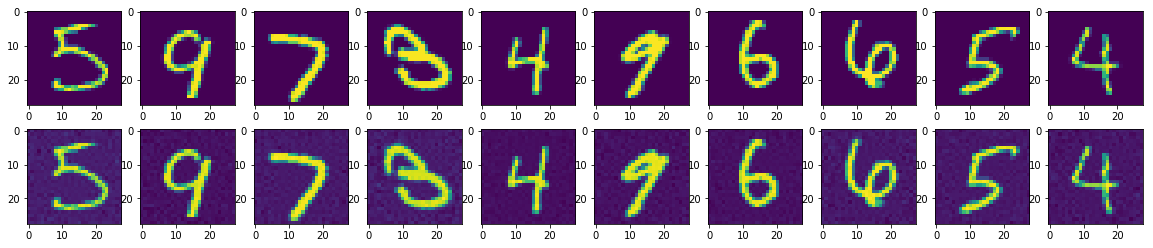

In [60]:
# ORIGINAL VS RECONSTRUCTED
f, a = plt.subplots(2, num_test_images, figsize=(20, 4))
for i in range(start_point,num_test_images+start_point):
    j = i-start_point
    a[0][j].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][j].imshow(np.reshape(results[j], (28, 28)))

In [82]:
print('MAX ', np.max(compressed))
print('MIN ', np.min(compressed))
print('MEAN = ', np.mean(compressed))
print('VAR = ', np.var(compressed))

MAX  5.53281
MIN  1.3836572
MEAN =  3.1098428
VAR =  0.6536135


In [83]:
print('MAX ', np.max(weight1))
print('MIN ', np.min(weight1))
print('MEAN = ', np.mean(weight1))
print('VAR = ', np.var(weight1))

MAX  0.07058997
MIN  -0.0005962405
MEAN =  0.035041206
VAR =  0.00040909328
